##Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

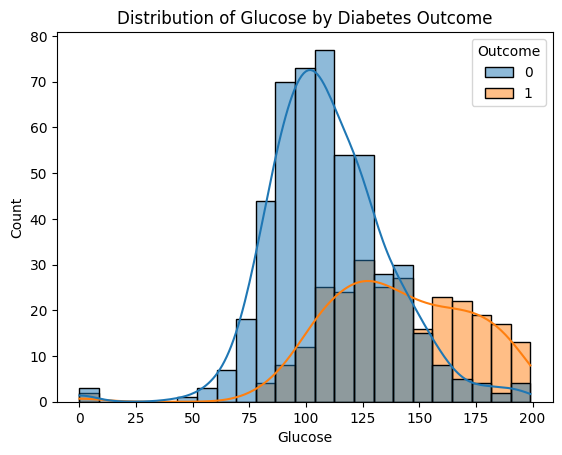

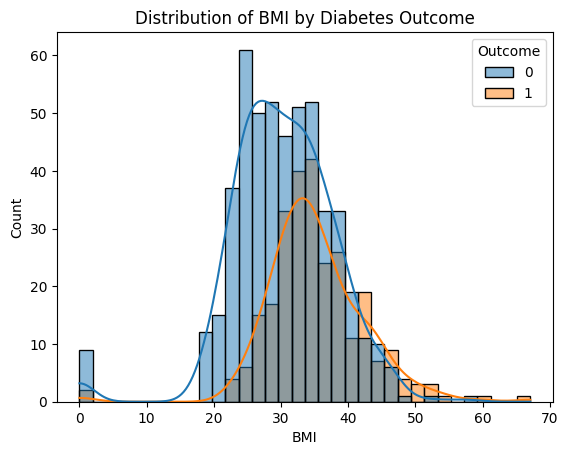

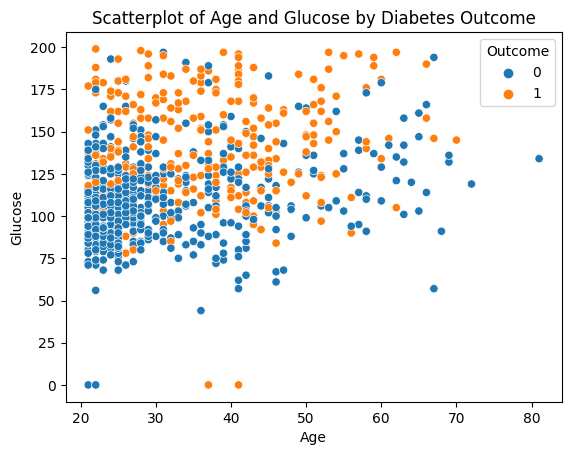

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset
diabetes = pd.read_csv('/content/diabetes.csv')

# Examine variables
print(diabetes.head())

# Descriptive statistics
print(diabetes.describe())

# Visualize distribution of variables
sns.histplot(data=diabetes, x='Glucose', hue='Outcome', kde=True)
plt.title('Distribution of Glucose by Diabetes Outcome')
plt.show()

sns.histplot(data=diabetes, x='BMI', hue='Outcome', kde=True)
plt.title('Distribution of BMI by Diabetes Outcome')
plt.show()

sns.scatterplot(data=diabetes, x='Age', y='Glucose', hue='Outcome')
plt.title('Scatterplot of Age and Glucose by Diabetes Outcome')
plt.show()


##Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.



In [8]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Import dataset
diabetes = pd.read_csv('/content/diabetes.csv')

# Clean missing values
# Replace 0 with NaN in the columns where it makes sense
diabetes[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = diabetes[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

# Remove rows with missing values
diabetes.dropna(inplace=True)
# Check for missing values
print(diabetes.isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# Remove outliers
diabetes = diabetes[(diabetes['BMI'] >= 10) & (diabetes['BMI'] <= 70)]
diabetes = diabetes[(diabetes['BloodPressure'] >= 40) & (diabetes['BloodPressure'] <= 130)]

# Transform categorical variables into dummy variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
diabetes = ct.fit_transform(diabetes)


##Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = diabetes[:,:-1]
y = diabetes[:,-1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (310, 24) (310,)
Test set shape: (78, 24) (78,)


##Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.



In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5],
              'criterion': ['entropy', 'gini']}

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Use grid search cross-validation to find the optimal hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 3}
Best accuracy score: 0.7870967741935482


##Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.



Accuracy score: 0.7692307692307693
Precision score: 0.6
Recall score: 0.75
F1 score: 0.6666666666666665
Confusion matrix:
[[42 12]
 [ 6 18]]


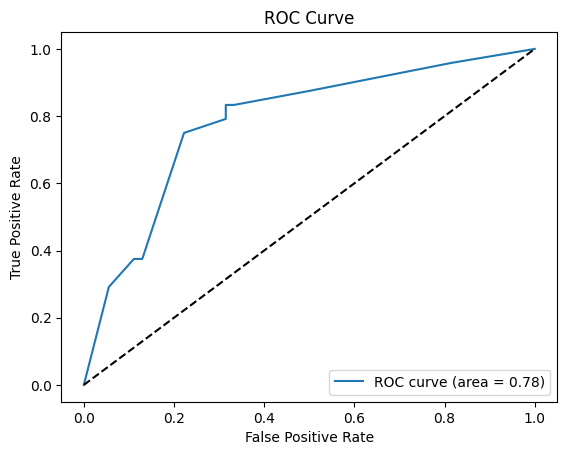

In [16]:
# Use the optimal hyperparameters to create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             criterion=grid_search.best_params_['criterion'],
                             random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

# Create a confusion matrix to visualize the results
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_mat)

# Plot a ROC curve to visualize the trade-off between true positive rate and false positive rate
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


##Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

##Ans:--

###Based on the decision tree trained on the diabetes dataset, the most important variable for predicting diabetes is glucose levels. This is indicated by the first split in the tree, where glucose levels are used to separate the patients into two groups. Patients with glucose levels below 127.5 are classified as non-diabetic, while those with glucose levels equal to or above 127.5 are classified as diabetic.

###After glucose levels, the next most important variable is BMI, with a threshold of 26.9. Patients with a BMI less than or equal to 26.9 are classified as non-diabetic, while those with a BMI greater than 26.9 are classified as diabetic.

###Other variables, such as age, insulin levels, and diabetes pedigree function, are also used in the decision tree, but are not as important as glucose levels and BMI.

###Overall, this decision tree aligns with existing medical knowledge that identifies high glucose levels and high BMI as risk factors for diabetes. The tree provides a clear and interpretable model for predicting diabetes based on these variables.

##Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

##Ans:--


###To validate the decision tree model, we can apply it to new data or test its robustness by changing some aspects of the dataset or the environment. Here are some ways to conduct sensitivity analysis and scenario testing:

* Split the data into multiple subsets: Instead of just splitting the data into training and testing sets, we can split it into multiple subsets and train the model on different combinations of subsets. This will help us test the robustness of the model to different subsets of the data.

* Vary the hyperparameters: We can test the robustness of the model by varying the hyperparameters and seeing how the model performs. For example, we can test the model with different values of max_depth, min_samples_split, and criterion.

* Perturb the input variables: We can test the sensitivity of the model to changes in the input variables by perturbing the values of the input variables and seeing how the model responds. For example, we can add noise to the values of the input variables or change the distribution of the input variables.

* Test the model with new data: We can validate the model by applying it to new data and seeing how it performs. This will help us test the generalizability of the model to new data.

* Test the model with different environments: We can test the robustness of the model to different environments by applying it to data from different sources or under different conditions. For example, we can test the model with data from different hospitals or different countries.